In [160]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
import pandas as pd

def boxplot(data_boxplot, x_label, y_label, tick = None, Title = 'Boxplot com distribuição de pontos'): 
    """Create a boxplot with scatter points.
    
    Args:
        data_boxplot (list): The data for the boxplot.
        x_label (str): The label for the x-axis.
        y_label (str): The label for the y-axis.
        tick (list or None): The tick labels for the x-axis. If None, x-axis tick labels are removed.
        
    Returns:
        None
        
    Examples:
        boxplot([data1, data2], 'X Label', 'Y Label', ['A', 'B', 'C'])
    """

    # Criar a figura e os eixos
    fig, ax = plt.subplots()

    # Plotar o boxplot
    box = ax.boxplot(data_boxplot, patch_artist=True, showfliers=True, showmeans= True,  boxprops=dict(facecolor='silver'),
                    meanprops=dict(marker='s', markerfacecolor='black', markeredgecolor='black', markersize=5),
                    flierprops=dict(marker='o', markerfacecolor='red',  markeredgecolor='red', markersize=4, alpha=1))
    
    # Adicionar um marcador manualmente para a legenda da média
    ax.plot([], [], marker='_', color='orange', label='Mediana', linestyle='None', markersize=5)
    ax.plot([], [], marker='s', color='black', label='Média', linestyle='None', markersize=5)
    ax.plot([], [], marker='o', color='red', label='Outliers', linestyle='None', markersize=5)

    # Ajustar a ordem das camadas de desenho 
    ax.set_zorder(2)  # Definir a ordem de desenho dos eixos para a frente
    
    if type(data_boxplot[0]) != list:
        x_scatter = np.full_like(data_boxplot, 1) + np.random.uniform(-0.055, 0.055, len(data_boxplot))
        ax.scatter(x_scatter, data_boxplot, color='red', alpha=1, zorder=3, s= 15)
    else:
        for i, box_data in enumerate(data_boxplot, start=1):
            x_scatter = np.full_like(box_data, i) + np.random.uniform(-0.05, 0.05, len(box_data))
            #ax.scatter(x_scatter, box_data, color='red', alpha=1, zorder=3, s= 10, label = 'Pontos' )  # Definir a ordem de desenho dos pontos de dispersão para a frente

    # Configurações adicionais
    ax.set_title(Title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    # Remover os rótulos do eixo x
    if tick is None:
        ax.set_xticklabels([])
        ax.tick_params(axis='x', which='both', bottom=False)
    else:
        ax.set_xticklabels(tick)
    # Mostrar o gráfico
    
    # plota legenda sinalizando os pontos, mediana e média
    ax.legend(loc='upper right')    
    return fig, ax

def histogram(dados, x_label, y_label, Title = 'Histograma', largura_bin = 5, v = None):
    """Create a histogram.
    
    Args:
        data (list): The data for the histogram.
        x_label (str): The label for the x-axis.
        y_label (str): The label for the y-axis.
        
    Returns:
        None
        
    Examples:
        histogram(data, 'X Label', 'Y Label')
    """
    
    # Criar a figura e os eixos
    fig, ax = plt.subplots()
    
    # Calcular o número de bins com base na largura desejada
    
    
    # Plotar o histograma
    if v is None:
        minimo = int(5*(np.min(dados)//5))
        maximo = int(5*(np.max(dados)//5) + 5)
        n_bins = np.arange(minimo, maximo + largura_bin, largura_bin)  # Isso cria uma sequência de bordas de bin
        # Plota os tick do eixo x de 10 em 10
        ax.hist(dados, bins=n_bins,  color='cadetblue', edgecolor='black')
        ax.set_xticks(np.arange(minimo, maximo + 1, 10))   
    else:
        minimo = np.min(dados) - 0.5  # Ajuste para centralizar no ano
        maximo = np.max(dados) + 0.5  # Ajuste para centralizar no ano
        n_bins = np.arange(minimo, maximo + largura_bin, largura_bin)  # Isso cria uma sequência de bordas de bin
    
        ax.hist(dados, bins = n_bins,  color='cadetblue', edgecolor='black', orientation= 'horizontal', align = 'mid', rwidth=0.8)
    # Configurações adicionais
    ax.set_title(Title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
    
    
    # Mostrar o gráfico
    plt.show()
    
    


In [161]:
# Ler o arquivo Excel
df = pd.read_excel('Cópia de EnqueteBolinhas (editado).xlsx')

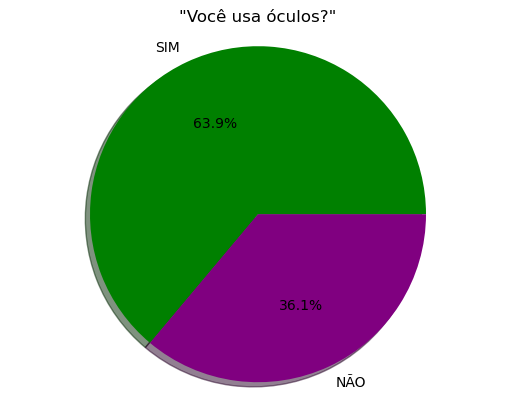

In [162]:
# Conta a quantidade de respostas 'SIM' e 'NÃO' da coluna 'Oculo' e plota um gráfico de pizza 3D verde pra SIM e roxo para NÃO

# Conta a quantidade de respostas 'SIM' e 'NÃO' da coluna 'Oculo'
sim = df['Oculo'].value_counts()['SIM']
nao = df['Oculo'].value_counts()['NÃO']

# Cria a figura e os eixos
fig, ax = plt.subplots()

# Plota o gráfico de pizza 3D
ax.pie([sim, nao], labels=['SIM', 'NÃO'], autopct='%1.1f%%', colors=['green', 'purple'], shadow=True)

# Configurações adicionais
ax.set_title('"Você usa óculos?"')

# Mostra o gráfico
plt.axis('equal')
plt.show()

# Salva como PNG
fig.savefig('grafico_pizza_022024.png')




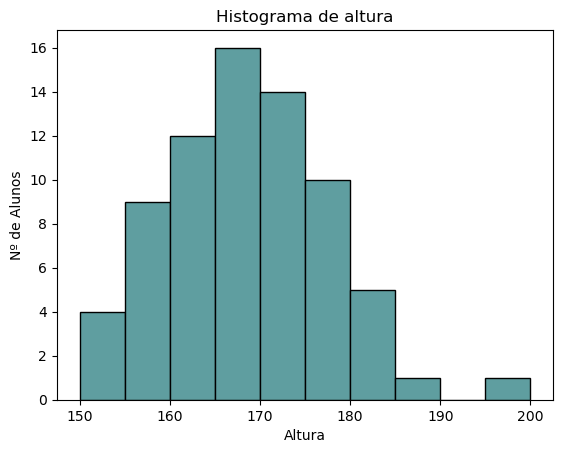

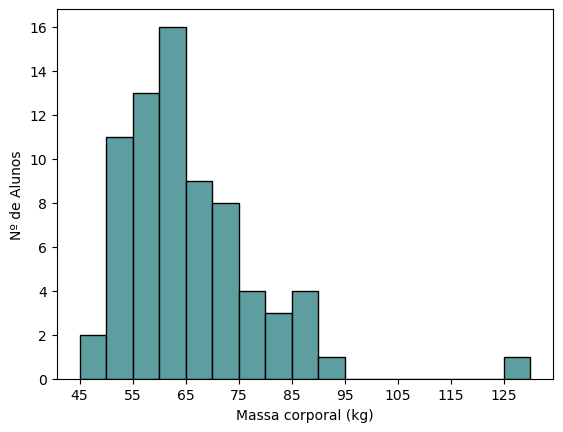

<Figure size 640x480 with 0 Axes>

In [163]:
def nw_data(df, x_data, cut_data, lim = 160):   
    data = [df[x_data][df[cut_data] < lim].tolist(), df[x_data][df[cut_data] >= lim].tolist()]
    return data

nome_da_coluna = 'Bolinhas'

altura = df['Altura'].tolist()
#data_altura = [df[nome_da_coluna].tolist() , nw_data(df, nome_da_coluna, 'Altura', lim =  160)[0], nw_data(df, nome_da_coluna, 'Altura', lim =  160)[1]]

massa = df['Massa'].tolist()
data_massa = [df[nome_da_coluna].tolist() , nw_data(df, nome_da_coluna, 'Massa', lim =  62)[0], nw_data(df, nome_da_coluna, 'Massa', lim =  62)[1]]

ano = df['Ano'].tolist()
data_ano = nw_data(df, nome_da_coluna, 'Ano', lim =  2023)


histogram(altura, 'Altura', 'Nº de Alunos', Title = 'Histograma de altura',largura_bin= 5)
#boxplot(data_altura, 'Altura', 'Nº de bolinhas', tick= ['all', '< 160', '>= 160'], Title = 'Boxplot com distribuição de pontos')

histogram(massa, 'Massa corporal (kg)', 'Nº de Alunos', Title = None, largura_bin= 5)

# Ajustar layout
plt.tight_layout()

plt.show()

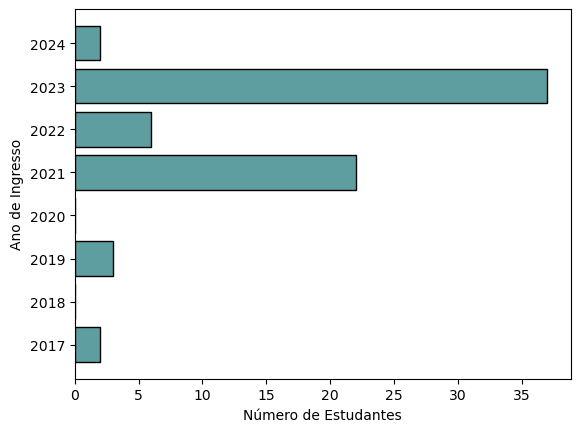

In [164]:
histogram(ano, 'Número de Estudantes', 'Ano de Ingresso', Title = None, largura_bin= 1, v = True)

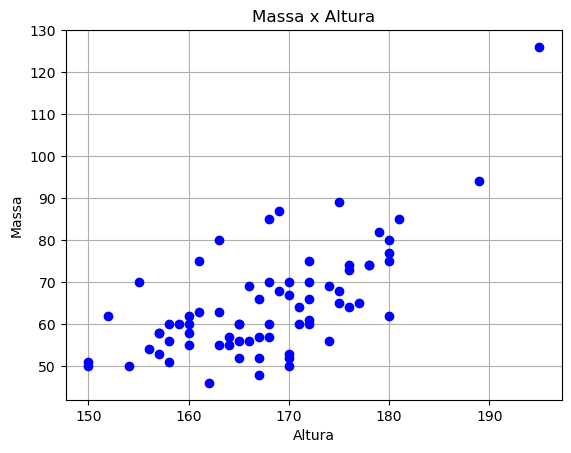

In [174]:
#plota um scatter da Massa em função da Altura
fig, ax = plt.subplots()
plt.grid(zorder = 1)
ax.scatter(altura, massa, color='blue', alpha=1, zorder =0)
ax.set_xlabel('Altura')
ax.set_ylabel('Massa')
ax.set_title('Massa x Altura')

plt.show()
